In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

### Definition of the model

In [14]:
# The SIR model differential equations.
def deriv(y, t, N, gamma,beta1,beta2,t_tresh=22):
    S,I,R = y

    if t<=t_tresh:
        B=beta1
    else:
        B=beta1*np.exp(-(t-t_tresh)/beta2)
    
    dSdt = -(B*I/N)*S 
    dIdt = (B*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

### Integration of the differential equations

In [15]:
def time_evo(N,beta1,beta2,gamma,death_rate,t_tresh=22,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,gamma,beta1,beta2,t_tresh))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,(1-death_rate/100)*R,R*death_rate/100)

### Show the result

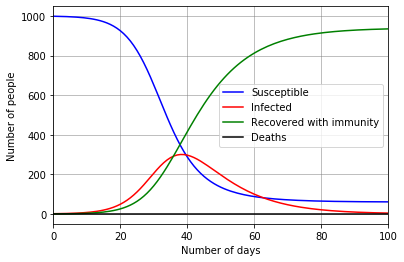

In [16]:
fin_result=time_evo(1000,0.3,10000,0.1,0)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered with immunity')
plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend()
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

#print(s_vec+i_vec+r_vec+m_vec)

### Load italian data

In [17]:
dataITA=pd.read_csv('dataITA.txt')

xdata=dataITA['Time']
ydata=dataITA['Infected']
ydata_death=dataITA['Deaths']
ydata_rec=dataITA['Recovered']

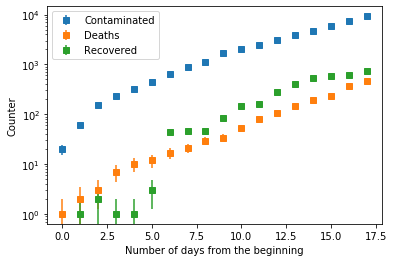

In [18]:
plt.errorbar(xdata,ydata,np.sqrt(ydata),linestyle='None',label='Contaminated',marker='s')
plt.errorbar(xdata,ydata_death,np.sqrt(ydata_death),linestyle='None',label='Deaths',marker='s')
plt.errorbar(xdata,ydata_rec,np.sqrt(ydata_rec),linestyle='None',label='Recovered',marker='s')
plt.yscale('log')
plt.xlabel('Number of days from the beginning')
plt.ylabel('Counter')
plt.legend()
plt.show()

### comparison between model and data

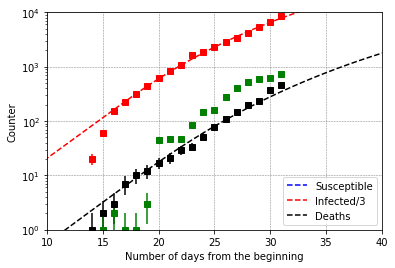

In [33]:
fin_result=time_evo(60*10**6,0.415,27,1/14,4.5,t_tresh=17,I0=2,t=np.arange(0,720))

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

plt.errorbar(xdata+14,ydata-ydata_rec,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+14,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+14,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xlim(10,40)
plt.ylim(1,10**4)
plt.xlabel('Number of days from the beginning')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('sirdatacomp.png',dpi=300)
plt.show()

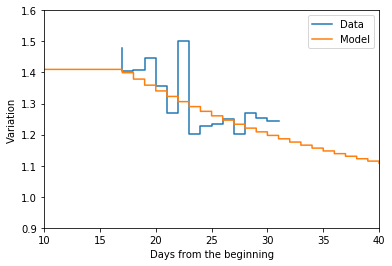

In [34]:
# percentage variation of the contaminted people, compared to the previous day


# data increment
incremento=[]

for i in range(3,len(ydata)):
    incremento.append(ydata[i]/ydata[i-1])
 

# sir increment
incr_SIR=[]

for i in range(len(i_vec)-1):
    incr_SIR.append(i_vec[i+1]/i_vec[i])

plt.step(xdata[xdata>=3]+14,incremento,label='Data')
plt.step(t[1:],incr_SIR,label='Model')
plt.xlabel('Days from the beginning')
plt.ylabel('Variation')
plt.xlim(10,40)
plt.ylim(0.9,1.6)
plt.legend()
plt.savefig('first_derivative_SIR.png',dpi=300)
plt.show()

## predictions

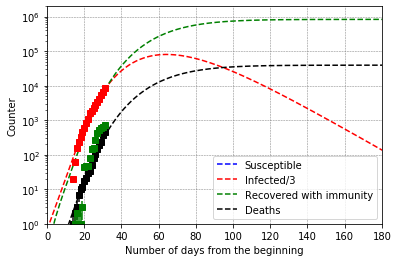

In [35]:
plt.errorbar(xdata+14,ydata-ydata_rec,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+14,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+14,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xlim(0,180)
plt.ylim(1,0.2*10**7)
plt.xlabel('Number of days from the beginning')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('sirdatacomp_prediction.png',dpi=300)
plt.show()

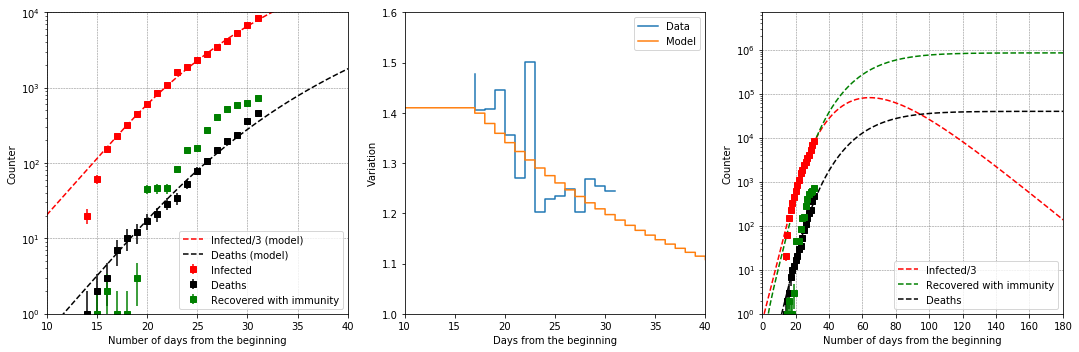

In [36]:
### combined plot

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.errorbar(xdata+14,ydata-ydata_rec,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s',label='Infected')
plt.errorbar(xdata+14,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths')
plt.errorbar(xdata+14,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered with immunity')
plt.plot(t, s_vec, 'b--')
plt.plot(t, i_vec/3, 'r--',label='Infected/3 (model)')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--',label='Deaths (model)')
plt.yscale('log')
plt.xlim(10,40)
plt.ylim(1,10**4)
plt.xlabel('Number of days from the beginning')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.subplot(1,3,2)
plt.step(xdata[xdata>=3]+14,incremento,label='Data')
plt.step(t[1:],incr_SIR,label='Model')
plt.xlabel('Days from the beginning')
plt.ylabel('Variation')
plt.xlim(10,40)
plt.ylim(1,1.6)
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(xdata+14,ydata-ydata_rec,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+14,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+14,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xlim(0,180)
plt.ylim(1,0.7*10**7)
plt.xlabel('Number of days from the beginning')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('combined_SIR.png',dpi=300)
plt.show()

In [37]:
print('Total deaths ',int(m_vec[-1]))
print('Total infected ',int(m_vec[-1]+r_vec[-1]))
print('Maximum infected ',int(i_vec.max()))
print('Maximum infected (hospitalized)',int(i_vec.max()/3*20/100))

Total deaths  39531
Total infected  878484
Maximum infected  242524
Maximum infected (hospitalized) 16168


In [39]:
modello_check=i_vec[16:16+len(ydata)-2]/3

data_check=(ydata-ydata_rec)[2:]

accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2)

print('The accuracy of the model on past data is ',accuracy,'%')

The accuracy of the model on past data is  3.99 %
